In [1]:
# The necessary modueles for the task are imported:

%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import math
import pandas

Initial investment: 1000
Annual growth in percent: 25
number of years: 10
monthly addition: 1000


Initial investment:1000.0
Annual growth rate:25.0%
Number of years:10
Monthly addition:1000.0
total return after specified time period:460543
principal:121000
Return on invested capital:281%
Interest:339543


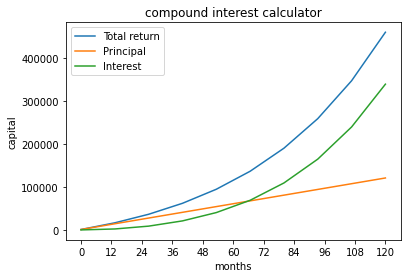

In [7]:
# First I define the variables, in which the user will be able to provide values through input.
# I also added a valueerror function, so that the entire thing doesn't crash if the user input is invalid!

while True:
    try:
        II = float(input("Initial investment:"))
        break
    except ValueError:
        print("invalid value")
while True:
    try:
        t2 = float(input("Annual growth in percent:"))
        break
    except ValueError:
        print("invalid value")
while True:
    try:
        ny = int(input("number of years:"))
        break
    except ValueError:
        print("invalid value")
while True:
    try:
        a = float(input("monthly addition:"))
        break
    except ValueError:
        print("invalid value")

# The variable "nm" is "number of months", which is converted from the user input "ny". This is more convenient for the F-formula because of the monthly additions to the investment which are compounded monthly with the rest of the previous invested capital.
# t1 represents a conversion to monthly compounding growth from the annual compounding growth (t2), where t1^12 = t2
# Here I also write the formulas, which will provide the user with the correct final value "F" based on the provided input values as well as "P", which is the total amount of invested capital over the given duration of time, also called "principal".
# Note: the monthly contributions are done in the beginning of each month, I will provide the ability to contribute at the end of each month as well in the future.

nm = ny*12
t1 = (((t2/100)+1)**(1/12))-1
F = round((II*(1+t1)**nm)+a*(((1+t1)**nm-1)/t1)*(1+t1))
P = round(nm*a+II)
print("Initial investment:" + str(II))
print("Annual growth rate:" + str(t2) + "%")
print("Number of years:" + str(ny))
print("Monthly addition:" + str(a))
print("total return after specified time period:" + str(F))
print("principal:" + str(round(nm * a + II)))
print("Return on invested capital:" + str(round((F / P) * 100) - 100) + "%")
print("Interest:" + str(F - P))

# In order to make the x-axis show relevant values for the given time span, I made a for-loop over the range corresponding to the number of months the investment takes place. Because I also want to include the final month, which by default would be excluded otherwise, I added 1.
# I found the x-axis to be the hardest part of making this graph, but I finally found a relatively satisfying way of spacing the values on the x-axis, that is every twelfth month, corresponding to a year. I will change this to something even moreappropriate when I've come further on this journey!

N = nm + 1
list_time = []
for i in range(N):
    list_time.append(i)
x = np.linspace(0 * nm, 1 * nm, 10)
plt.xticks(list_time[::12])

# Here I assign the labels to the three different plots, as well as define the functions that determine the appearance of the plots.
# The y-values of the "total return" plot are determined by the same F-formula that defines the return value after the investment period.
# The y-values of the "Principal" plot are determined by the total amount of monthly additions plus the initial investment.
# The y-values of the "Interest" plot are determined by the "total return" values minus the "Principal" values.That is, the change in total value of the investment without the influence of monthly contributions.

plt.xlabel('months')
plt.ylabel('capital')
plt.title('compound interest calculator')
plt.plot(x,((II*(1+t1)**x)+a*(((1+t1)**x-1)/t1)*(1+t1)))
plt.plot(x,a*x+II)
plt.plot(x,((II*(1+t1)**x)+a*(((1+t1)**x-1)/t1)*(1+t1))-(a*x+II))
plt.legend(['Total return','Principal','Interest'])